In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

In [28]:
df = pd.read_csv('Data/flights_cleaned.csv')

In [30]:
df.months

0         8
1         8
2         8
3         8
4         8
         ..
312788    8
312789    8
312790    8
312791    8
312792    8
Name: months, Length: 312793, dtype: int64

# Task 1

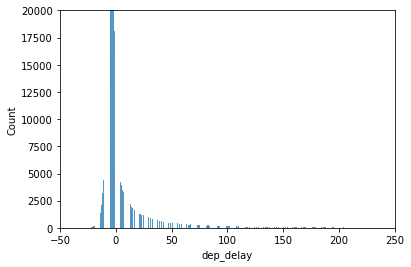

In [12]:
sns.histplot(df.dep_delay)
plt.xlim(-50, 250)
plt.ylim(0, 20000)
plt.show()

In [13]:
# Anderson-Darling test for normality

from scipy.stats import anderson

scipy.stats.anderson(df.dep_delay, dist='norm')

# The significance level below indicates the data is normally distributed.

AndersonResult(statistic=56214.537472699536, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

# Task 2: average/median monthly delay different during the year

C:\Users\Sujan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='months', ylabel='dep_delay'>

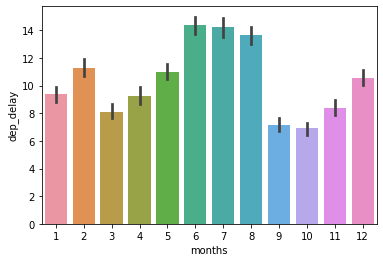

In [31]:
sns.barplot(df.months, df.dep_delay)

In [18]:
# Month 6,7,8 (June, July, Aug) has the highest delays.

# Task 3: # Does the weather affect the delay?

# Task 4: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [3]:
task4a = df.groupby(['dep_time'])['taxi_out'].mean()
task4a = pd.DataFrame(task4a)
task4a

,taxi_out
dep_time,
1.0,16.317073
2.0,17.208333
3.0,15.633333
4.0,19.351351
5.0,17.619048
...,...
2356.0,18.816327
2357.0,17.170732
2358.0,16.600000


C:\Users\Sujan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dep_time', ylabel='taxi_out'>

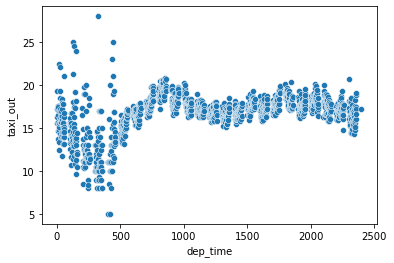

In [4]:
sns.scatterplot(task4a.index, task4a.taxi_out)

In [5]:
# above figure shows the change in taxi time during the day

(0.0, 900.0)

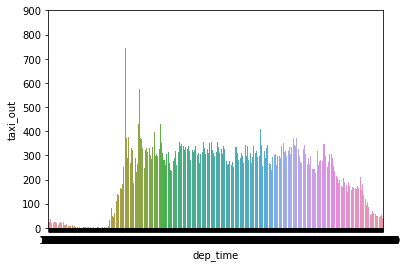

In [42]:
sns.barplot(y=task4b.taxi_out, x=task4b.index)
plt.ylim(0,900)

# Task 5: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [6]:
delay_caused_by_dep_delay = len(df[(df['dep_delay']>0) & df['arr_delay']>0 ])

In [7]:
total_arr_delay = len(df[df['arr_delay']>0])

In [8]:
per = (delay_caused_by_dep_delay / total_arr_delay)*100
print("On average percentage of arrival delays caused by departure delays:", round(per),'%')

On average percentage of arrival delays caused by departure delays: 95 %


In [9]:
df[(df['dep_delay']>0) & df['arr_delay']>0 ]['air_time'].mean()

113.4454138290123

In [10]:
df.air_time.mean()

107.9463527968604

In [11]:
# Since average air_time during delays is more, airlines are not able to lower the delay during the flights

# Task 6: How many states cover 50% of US air traffic?

In [32]:
df.origin_city_name.unique()

array(['Raleigh/Durham, NC', 'Denver, CO', 'Philadelphia, PA',
       'Miami, FL', 'Chicago, IL', 'San Antonio, TX',
       'Dallas/Fort Worth, TX', 'Los Angeles, CA', 'Phoenix, AZ',
       'Newark, NJ', 'St. Louis, MO', 'Houston, TX', 'San Francisco, CA',
       'Honolulu, HI', 'San Diego, CA', 'Washington, DC',
       'Kansas City, MO', 'New York, NY', 'Grand Rapids, MI',
       'Charlotte, NC', 'Indianapolis, IN', 'Austin, TX', 'Boston, MA',
       'Rochester, NY', 'Oklahoma City, OK', 'Atlanta, GA',
       'Des Moines, IA', 'Richmond, VA', 'Detroit, MI',
       'Fort Lauderdale, FL', 'Seattle, WA', 'Rapid City, SD',
       'Owensboro, KY', 'Lubbock, TX', 'Brownsville, TX', 'Peoria, IL',
       'Minneapolis, MN', 'Lincoln, NE', 'Montgomery, AL',
       'Burlington, VT', 'Pittsburgh, PA', 'San Jose, CA',
       'Green Bay, WI', 'Omaha, NE', 'Louisville, KY', 'Buffalo, NY',
       'Las Vegas, NV', 'Orlando, FL', 'Worcester, MA', 'Hartford, CT',
       'Baton Rouge, LA', 'Albany, NY', 